# **Connecting GDrive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Testing TensorFlow and GPU**

In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
print(tf.__version__)

Found GPU at: /device:GPU:0
2.5.0


# **Importing Libraries**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
np.random.seed(1337)  # for reproducibility
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Dropout, Activation, Embedding, LSTM, SimpleRNN, GRU
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import regularizers
from keras.utils.np_utils import to_categorical
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_auc_score, roc_curve
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder

%matplotlib inline


## **Multiclass DNN 8020 Random_state**

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

(2292469, 32) (434149, 32)
(2292469, 13) (434149, 13)
Epoch 1/30
35820/35820 [==============================] - 225s 6ms/step - loss: 0.2122 - accuracy: 0.9098 - val_loss: 0.1169 - val_accuracy: 0.9465
Epoch 2/30
35820/35820 [==============================] - 214s 6ms/step - loss: 0.1348 - accuracy: 0.9390 - val_loss: 0.1173 - val_accuracy: 0.9460
Epoch 3/30
35820/35820 [==============================] - 214s 6ms/step - loss: 0.1277 - accuracy: 0.9416 - val_loss: 0.1048 - val_accuracy: 0.9502
Epoch 4/30
35820/35820 [==============================] - 213s 6ms/step - loss: 0.1257 - accuracy: 0.9427 - val_loss: 0.1157 - val_accuracy: 0.9467
Epoch 5/30
35820/35820 [==============================] - 212s 6ms/step - loss: 0.1241 - accuracy: 0.9436 - val_loss: 0.1174 - val_accuracy: 0.9520
Epoch 6/30
35820/35820 [==============================] - 213s 6ms/step - loss: 0.1267 - accuracy: 0.9438 - val_loss: 0.1074 - val_accuracy: 0.9493
Epoch 7/30
35820/35820 [==============================] - 

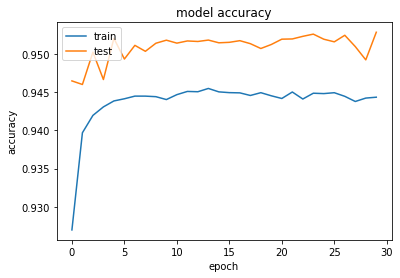

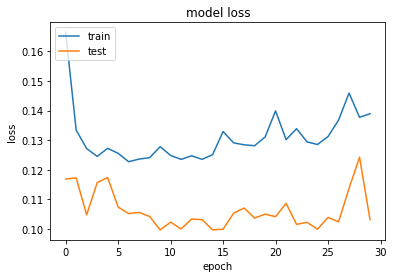

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(439964, 78) (439964,)
(439964, 32) (439964, 13)
13749/13749 [==============================] - 44s 3ms/step - loss: 0.1229 - accuracy: 0.9505


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57238
           1       0.74      0.76      0.75      2000
           2       0.80      0.89      0.84      2000
           3       1.00      1.00      1.00    137203
           4       0.99      1.00      1.00       346
           5       0.94      1.00      0.97      8302
           6       1.00      0.99      0.99     92382
           7       0.76      0.52      0.61     27978
           8       0.79      0.99      0.88      2198
           9       0.72      0.88      0.79     38671
          10       1.00      0.95      0.97     32128
          11       0.76      0.66      0.71      2000
          12       0.99      1.00      1.00     37518

   micro avg       0.95      0.95      0.95    439964
   macro avg       0.88      0.89      0.89    439964
weighted avg       0.95      0.95      0.95    439964
 samples avg       0.95      0.95      0.95    439964

[[ 57222      0      0   

In [5]:
## Loading the Dataset
dataset = pd.read_csv("/content/drive/MyDrive/M.Tech Project/Dataset and Codes/CIC IDS 2018/cic-ids-2018-multiclass.csv")
dataset = dataset.drop(['Unnamed: 0', 'label'],axis=1)

## Separating the Dependent(X) and Independent(Y) ##
X = dataset.iloc[:, :-1]
Y = dataset.iloc[:,-1]

## Splitting the Data into Train and Test Sets ##
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

## Normalizing the X_train ##
scaler = Normalizer().fit(X_train)
X_train = scaler.transform(X_train)

## Normalizing the X_test ##
scaler = Normalizer().fit(X_test)
X_test = scaler.transform(X_test)

## Upsampling the Training Set using SMOTE ##
from imblearn.over_sampling import SMOTE
strategy = {5:100000, 8:100000, 4:100000, 1:100000, 2:100000, 11:100000}
oversample = SMOTE(sampling_strategy = strategy)
X_train, Y_train = oversample.fit_resample(X_train, Y_train)

## Converting into Numpy Arrays ##
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

## Converting the Dependent Variable into Categories (Vector of values for each class)
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

# #### Defining Autoencoder ####
# #### Defining the AutoEncoder Model ####
# # 78 -> 64 -> 32 -> 64 -> 78 #

# #### INPUT Layer ####
# input_layer = Input(shape=(78,))
# #### Encoder Layer - 64 ####
# encoded_layer = Dense(64, activation='relu')(input_layer)
# #### BottleNeck ####
# bottleneck = Dense(32, activation='relu')(encoded_layer)
# #### Decoder Layer - 64 ####
# decoded_layer = Dense(64, activation='relu')(bottleneck)
# #### OutPut Layer ####
# output_layer = Dense(78, activation='relu')(decoded_layer)

# AutoEncoder = Model(inputs = input_layer, outputs = output_layer)
# AutoEncoder.summary()
# AutoEncoder.compile(optimizer='rmsprop', loss='mse')
# with tf.device('/device:GPU:0'):
#   AutoEncoder_History = AutoEncoder.fit(X_train, X_train, batch_size=64, epochs=30, validation_data=(X_test, X_test))
# AutoEncoder.save('/content/drive/MyDrive/M.Tech Project/Dataset and Codes/Saved Models/AutoEncoder5LayerSMOTEUpdated.h5')

# print(AutoEncoder_History.history.keys())
# # summarize history for loss
# plt.plot(AutoEncoder_History.history['loss'])
# plt.plot(AutoEncoder_History.history['val_loss'])
# plt.title('AutoEncoder Loss Curves')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

AutoEncoder = load_model('/content/drive/MyDrive/M.Tech Project/Dataset and Codes/Saved Models/AutoEncoder5LayerSMOTEUpdated.h5')

encoder = Sequential()
encoder.add(AutoEncoder.layers[0])
encoder.add(AutoEncoder.layers[1])
encoder.add(AutoEncoder.layers[2])
# encoder.summary()

X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

print(X_train_encoded.shape, X_test_encoded.shape)
print(Y_train.shape, Y_test.shape)

# 1. define the network
model = Sequential()
model.add(Dense(1024,input_dim=32,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(768,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(512,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(256,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(128,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(13))
model.add(Activation('softmax'))

# try using different optimizers and different optimizer configs
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
with tf.device('/device:GPU:0'):
  model_history = model.fit(X_train_encoded, Y_train, validation_data=(X_test_encoded, Y_test), batch_size=64, epochs=30)
model.save('/content/drive/MyDrive/M.Tech Project/Dataset and Codes/Saved Models/AutoEncoder5LayeredSMOTEDNN5layeredMulticlassDNNSMOTEUpdatedNew.h5')

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Generating Predictions

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

## Normalizing the X_test
scaler = Normalizer().fit(X_test)
X_test = scaler.transform(X_test)
## Converting to Numpy Arrays
Y_test = np.array(Y_test)

## SMOTE for Test Samples
from imblearn.over_sampling import SMOTE
strategy = {1:2000, 2:2000, 11:2000}
oversample = SMOTE(sampling_strategy = strategy)
X_test, Y_test = oversample.fit_resample(X_test, Y_test)
print(X_test.shape, Y_test.shape)
Y_test = np.array(Y_test)

## Converting Output Labels to Sparse Format
Y_test = to_categorical(Y_test)

# ## Loading the AutoEncoder for Compressing Test Data
# AutoEncoder = load_model('/content/drive/MyDrive/M.Tech Project/Dataset and Codes/Saved Models/AutoEncoder5LayerSMOTEUpdated.h5')
# AutoEncoder.evaluate(X_test, X_test)

# ## Extracting the Encoder Module
# encoder = Sequential()
# encoder.add(AutoEncoder.layers[0])
# encoder.add(AutoEncoder.layers[1])
# encoder.add(AutoEncoder.layers[2])

## Encoding the Testing Data
X_test_encoded = encoder.predict(X_test)
print(X_test_encoded.shape, Y_test.shape)
## Evaluating Model
model.evaluate(X_test_encoded, Y_test)

## Generating Predictions
Y_predicted = np.round(model.predict(X_test_encoded))
Y_predicted = np.reshape(Y_predicted, Y_test.shape)

## Generating Classification Report on the Predicted vs Actual Value
print(classification_report(Y_test, Y_predicted))

## Generating the Confusion Matrix
cm = confusion_matrix(Y_test.argmax(axis=1), Y_predicted.argmax(axis=1))
print(cm)

# **Data Preparation**

## **Importing Dataset**

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/M.Tech Project/Dataset and Codes/CIC IDS 2018/cic-ids-2018-preprocessed.csv")
dataset = dataset.drop(['Unnamed: 0', 'label'],axis=1)
dataset.shape

(3213346, 79)

In [ ]:
dataset.head()

,dst_port,protocol,flow_duration,tot_fwd_pkts,tot_bwd_pkts,totlen_fwd_pkts,totlen_bwd_pkts,fwd_pkt_len_max,fwd_pkt_len_min,fwd_pkt_len_mean,fwd_pkt_len_std,bwd_pkt_len_max,bwd_pkt_len_min,bwd_pkt_len_mean,bwd_pkt_len_std,flow_byts_s,flow_pkts_s,flow_iat_mean,flow_iat_std,flow_iat_max,flow_iat_min,fwd_iat_tot,fwd_iat_mean,fwd_iat_std,fwd_iat_max,fwd_iat_min,bwd_iat_tot,bwd_iat_mean,bwd_iat_std,bwd_iat_max,bwd_iat_min,fwd_psh_flags,bwd_psh_flags,fwd_urg_flags,bwd_urg_flags,fwd_header_len,bwd_header_len,fwd_pkts_s,bwd_pkts_s,pkt_len_min,pkt_len_max,pkt_len_mean,pkt_len_std,pkt_len_var,fin_flag_cnt,syn_flag_cnt,rst_flag_cnt,psh_flag_cnt,ack_flag_cnt,urg_flag_cnt,cwe_flag_count,ece_flag_cnt,down_up_ratio,pkt_size_avg,fwd_seg_size_avg,bwd_seg_size_avg,fwd_byts_b_avg,fwd_pkts_b_avg,fwd_blk_rate_avg,bwd_byts_b_avg,bwd_pkts_b_avg,bwd_blk_rate_avg,subflow_fwd_pkts,subflow_fwd_byts,subflow_bwd_pkts,subflow_bwd_byts,init_fwd_win_byts,init_bwd_win_byts,fwd_act_data_pkts,fwd_seg_size_min,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,category
0,8080,6,16079.0,3,4,326,129,326,0,108.666667,188.216188,112,0,32.25,53.767245,28297.77971,435.350457,2679.833333,6080.854855,15084.0,1.0,645.0,322.5,374.059487,587.0,58.0,15513.0,5171.000000,8587.564206,15084.0,1,0,0,0,0,72,92,186.578767,248.771690,0,326,56.875,115.406657,13318.69643,0,0,1,1,0,0,0,1,1,65.0,108.666667,32.25,0,0,0,0,0,0,3,326,4,129,8192,219,1,20,0.0,0.0,0,0,0.0,0.0,0.0,0.0,1
1,8080,6,577.0,2,0,0,0,0,0,0.000000,0.000000,0,0,0.00,0.000000,0.00000,3466.204506,577.000000,0.000000,577.0,577.0,577.0,577.0,0.000000,577.0,577.0,0.0,0.000000,0.000000,0.0,0,0,0,0,0,40,0,3466.204506,0.000000,0,0,0.000,0.000000,0.00000,0,0,0,0,1,0,0,0,0,0.0,0.000000,0.00,0,0,0,0,0,0,2,0,0,0,2052,-1,0,20,0.0,0.0,0,0,0.0,0.0,0.0,0.0,1
2,8080,6,10279.0,3,4,326,129,326,0,108.666667,188.216188,112,0,32.25,53.767245,44265.00632,681.000097,1713.166667,3693.591716,9243.0,20.0,577.0,288.5,335.875721,526.0,51.0,9773.0,3257.666667,5185.563165,9243.0,117,0,0,0,0,72,92,291.857185,389.142913,0,326,56.875,115.406657,13318.69643,0,0,1,1,0,0,0,1,1,65.0,108.666667,32.25,0,0,0,0,0,0,3,326,4,129,8192,219,1,20,0.0,0.0,0,0,0.0,0.0,0.0,0.0,1
3,8080,6,457.0,2,0,0,0,0,0,0.000000,0.000000,0,0,0.00,0.000000,0.00000,4376.367615,457.000000,0.000000,457.0,457.0,457.0,457.0,0.000000,457.0,457.0,0.0,0.000000,0.000000,0.0,0,0,0,0,0,40,0,4376.367615,0.000000,0,0,0.000,0.000000,0.00000,0,0,0,0,1,0,0,0,0,0.0,0.000000,0.00,0,0,0,0,0,0,2,0,0,0,2052,-1,0,20,0.0,0.0,0,0,0.0,0.0,0.0,0.0,1
4,8080,6,10271.0,3,4,326,129,326,0,108.666667,188.216188,112,0,32.25,53.767245,44299.48398,681.530523,1711.833333,3786.768196,9434.0,20.0,502.0,251.0,288.499567,455.0,47.0,9836.0,3278.666667,5333.075692,9434.0,41,0,0,0,0,72,92,292.084510,389.446013,0,326,56.875,115.406657,13318.69643,0,0,1,1,0,0,0,1,1,65.0,108.666667,32.25,0,0,0,0,0,0,3,326,4,129,8192,219,1,20,0.0,0.0,0,0,0.0,0.0,0.0,0.0,1


In [ ]:
dataset['category'].value_counts()

0     1042603
4      686012
7      461912
1      286191
10     193354
13     187589
11     160639
8      139890
6       41508
9       10990
5        1730
2         611
3         230
12         87
Name: category, dtype: int64

## **Preparing Dataset**

In [ ]:
X = dataset.iloc[:, :-1]
Y = dataset.iloc[:,-1]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2570676, 78)
(2570676,)
(642670, 78)
(642670,)


In [ ]:
Y_train.value_counts()

0     834082
4     548809
7     369530
1     228953
10    154683
13    150071
11    128511
8     111912
6      33206
9       8792
5       1384
2        489
3        184
12        70
Name: category, dtype: int64

In [ ]:
Y_test.value_counts()

0     208521
4     137203
7      92382
1      57238
10     38671
13     37518
11     32128
8      27978
6       8302
9       2198
5        346
2        122
3         46
12        17
Name: category, dtype: int64

In [ ]:
## Computing Class Weights ##
from sklearn.utils import class_weight
weights = class_weight.compute_class_weight('balanced', np.unique(Y_train), Y_train)
weights = dict(enumerate(weights))
print(weights)

{0: 0.22014587808598468, 1: 0.8019974155643922, 2: 375.50043821209465, 3: 997.9332298136646, 4: 0.3345785405955702, 5: 132.6732039636664, 6: 5.529714939640857, 7: 0.4969006962512226, 8: 1.6407508961122514, 9: 20.884862862342388, 10: 1.187071069773112, 11: 1.4288248810274162, 12: 2623.138775510204, 13: 1.2235522804919956}


In [ ]:
## Round up the weights, cannot use fractions ##
weights_updated = {0: 1, 1: 1, 2: 376, 3: 998, 4: 1, 5: 132, 6: 5, 7: 1, 8: 2, 9: 21, 10: 2, 11: 2, 12: 2627, 13: 2}
print(weights_updated)

{0: 1, 1: 1, 2: 376, 3: 998, 4: 1, 5: 132, 6: 5, 7: 1, 8: 2, 9: 21, 10: 2, 11: 2, 12: 2627, 13: 2}


In [ ]:
##Normalizing the X_train
scaler = Normalizer().fit(X_train)
X_train = scaler.transform(X_train)

In [ ]:
##Normalizing the X_test
scaler = Normalizer().fit(X_test)
X_test = scaler.transform(X_test)

In [ ]:
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

In [ ]:
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [ ]:
print(type(X_train))
print(type(X_test))
print(type(Y_train))
print(type(Y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
Y_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
Y_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2570676, 78)
(2570676, 14)
(642670, 78)
(642670, 14)


# **DNN with Class Weights**

## **Model with 1 Layer**

In [ ]:
# 1. define the network
model = Sequential()
model.add(Dense(1024,input_dim=78,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(14))
model.add(Activation('softmax'))

# try using different optimizers and different optimizer configs
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
with tf.device('/device:GPU:0'):
  model_history = model.fit(Xtrain, Ytrain, validation_data=(Xtest, Ytest), class_weight = weights, batch_size=64, epochs=100)

Epoch 1/100
40167/40167 [==============================] - 148s 4ms/step - loss: 0.3175 - accuracy: 0.8861 - val_loss: 0.2050 - val_accuracy: 0.9207
Epoch 2/100
40167/40167 [==============================] - 145s 4ms/step - loss: 0.1985 - accuracy: 0.9213 - val_loss: 0.1940 - val_accuracy: 0.9247
Epoch 3/100
40167/40167 [==============================] - 147s 4ms/step - loss: 0.1909 - accuracy: 0.9234 - val_loss: 0.1868 - val_accuracy: 0.9262
Epoch 4/100
40167/40167 [==============================] - 147s 4ms/step - loss: 0.1862 - accuracy: 0.9251 - val_loss: 0.1842 - val_accuracy: 0.9268
Epoch 5/100
40167/40167 [==============================] - 146s 4ms/step - loss: 0.1839 - accuracy: 0.9260 - val_loss: 0.1943 - val_accuracy: 0.9178
Epoch 6/100
40167/40167 [==============================] - 146s 4ms/step - loss: 0.1823 - accuracy: 0.9266 - val_loss: 0.1819 - val_accuracy: 0.9273
Epoch 7/100
40167/40167 [==============================] - 146s 4ms/step - loss: 0.1813 - accuracy: 0.9268

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


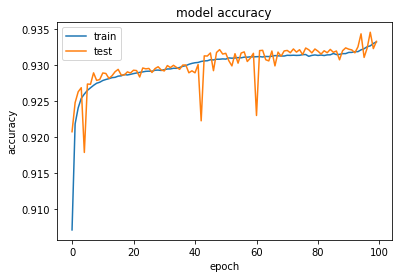

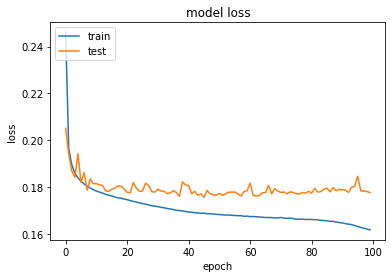

In [ ]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## **Model with 2 Layers**

In [ ]:
# 1. define the network
model = Sequential()
model.add(Dense(1024,input_dim=78,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(768,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(14))
model.add(Activation('softmax'))

# try using different optimizers and different optimizer configs
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
with tf.device('/device:GPU:0'):
  model_history = model.fit(Xtrain, Ytrain, validation_data=(Xtest, Ytest), class_weight = weights, batch_size=64, epochs=100)

Epoch 1/100
40167/40167 [==============================] - 119s 3ms/step - loss: 0.2644 - accuracy: 0.9000 - val_loss: 0.2007 - val_accuracy: 0.9225
Epoch 2/100
40167/40167 [==============================] - 117s 3ms/step - loss: 0.1876 - accuracy: 0.9254 - val_loss: 0.1934 - val_accuracy: 0.9226
Epoch 3/100
40167/40167 [==============================] - 116s 3ms/step - loss: 0.1811 - accuracy: 0.9273 - val_loss: 0.1821 - val_accuracy: 0.9286
Epoch 4/100
40167/40167 [==============================] - 116s 3ms/step - loss: 0.1785 - accuracy: 0.9279 - val_loss: 0.1780 - val_accuracy: 0.9291
Epoch 5/100
40167/40167 [==============================] - 118s 3ms/step - loss: 0.1766 - accuracy: 0.9285 - val_loss: 0.1782 - val_accuracy: 0.9278
Epoch 6/100
40167/40167 [==============================] - 118s 3ms/step - loss: 0.1752 - accuracy: 0.9292 - val_loss: 0.1748 - val_accuracy: 0.9302
Epoch 7/100
40167/40167 [==============================] - 118s 3ms/step - loss: 0.1731 - accuracy: 0.9297

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


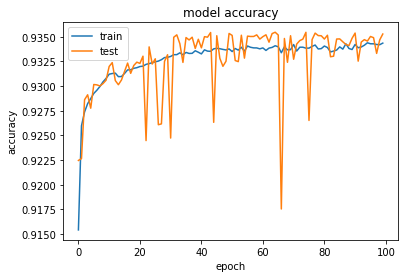

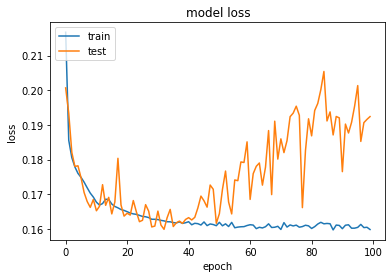

In [ ]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## **Model with 3 Layers**

In [ ]:
# 1. define the network
model = Sequential()
model.add(Dense(1024,input_dim=78,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(768,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(512,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(14))
model.add(Activation('softmax'))

# try using different optimizers and different optimizer configs
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
with tf.device('/device:GPU:0'):
  model_history = model.fit(Xtrain, Ytrain, validation_data=(Xtest, Ytest), class_weight = weights, batch_size=64, epochs=100)

Epoch 1/100
40167/40167 [==============================] - 120s 3ms/step - loss: 0.2602 - accuracy: 0.9019 - val_loss: 0.2033 - val_accuracy: 0.9208
Epoch 2/100
40167/40167 [==============================] - 117s 3ms/step - loss: 0.1914 - accuracy: 0.9242 - val_loss: 0.1926 - val_accuracy: 0.9241
Epoch 3/100
40167/40167 [==============================] - 118s 3ms/step - loss: 0.1835 - accuracy: 0.9268 - val_loss: 0.1802 - val_accuracy: 0.9276
Epoch 4/100
40167/40167 [==============================] - 116s 3ms/step - loss: 0.1809 - accuracy: 0.9275 - val_loss: 0.1799 - val_accuracy: 0.9276
Epoch 5/100
40167/40167 [==============================] - 116s 3ms/step - loss: 0.1790 - accuracy: 0.9282 - val_loss: 0.1743 - val_accuracy: 0.9293
Epoch 6/100
40167/40167 [==============================] - 118s 3ms/step - loss: 0.1772 - accuracy: 0.9288 - val_loss: 0.1737 - val_accuracy: 0.9295
Epoch 7/100
40167/40167 [==============================] - 118s 3ms/step - loss: 0.1755 - accuracy: 0.9296

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


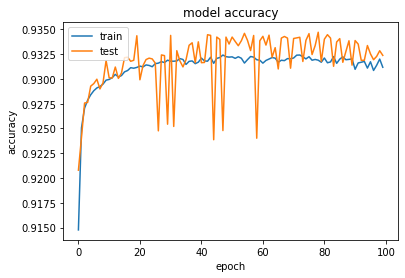

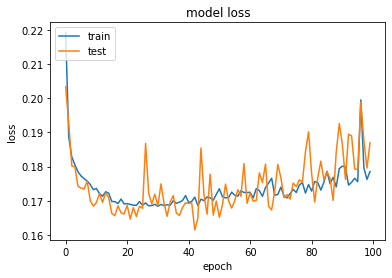

In [ ]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## **Model with 4 Layers**

In [ ]:
# 1. define the network
model = Sequential()
model.add(Dense(1024,input_dim=78,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(768,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(512,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(256,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(14))
model.add(Activation('softmax'))

# try using different optimizers and different optimizer configs
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
with tf.device('/device:GPU:0'):
  model_history = model.fit(Xtrain, Ytrain, validation_data=(Xtest, Ytest), class_weight = weights, batch_size=64, epochs=100)

Epoch 1/100
40167/40167 [==============================] - 129s 3ms/step - loss: 0.2649 - accuracy: 0.8999 - val_loss: 0.1932 - val_accuracy: 0.9230
Epoch 2/100
40167/40167 [==============================] - 126s 3ms/step - loss: 0.1938 - accuracy: 0.9232 - val_loss: 0.1874 - val_accuracy: 0.9250
Epoch 3/100
40167/40167 [==============================] - 125s 3ms/step - loss: 0.1869 - accuracy: 0.9254 - val_loss: 0.1818 - val_accuracy: 0.9277
Epoch 4/100
40167/40167 [==============================] - 125s 3ms/step - loss: 0.1836 - accuracy: 0.9266 - val_loss: 0.1775 - val_accuracy: 0.9273
Epoch 5/100
40167/40167 [==============================] - 126s 3ms/step - loss: 0.1817 - accuracy: 0.9272 - val_loss: 0.1792 - val_accuracy: 0.9279
Epoch 6/100
40167/40167 [==============================] - 123s 3ms/step - loss: 0.1810 - accuracy: 0.9278 - val_loss: 0.1759 - val_accuracy: 0.9290
Epoch 7/100
40167/40167 [==============================] - 124s 3ms/step - loss: 0.1805 - accuracy: 0.9275

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


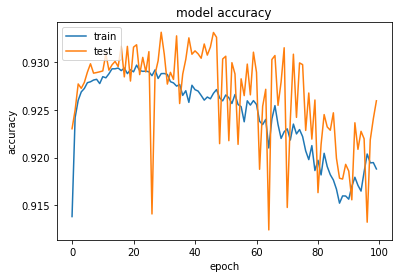

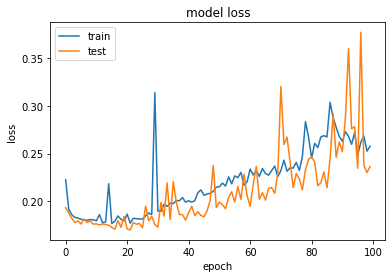

In [ ]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## **Model with 5 Layers**

In [ ]:
# 1. define the network
model = Sequential()
model.add(Dense(1024,input_dim=78,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(768,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(512,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(256,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(128,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(14))
model.add(Activation('softmax'))

# try using different optimizers and different optimizer configs
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
with tf.device('/device:GPU:0'):
  model_history = model.fit(Xtrain, Ytrain, validation_data=(Xtest, Ytest), class_weight = weights, batch_size=64, epochs=100)

Epoch 1/100
40167/40167 [==============================] - 130s 3ms/step - loss: 0.2714 - accuracy: 0.8984 - val_loss: 0.1920 - val_accuracy: 0.9244
Epoch 2/100
40167/40167 [==============================] - 130s 3ms/step - loss: 0.1969 - accuracy: 0.9224 - val_loss: 0.1861 - val_accuracy: 0.9260
Epoch 3/100
40167/40167 [==============================] - 129s 3ms/step - loss: 0.1896 - accuracy: 0.9251 - val_loss: 0.1866 - val_accuracy: 0.9270
Epoch 4/100
40167/40167 [==============================] - 129s 3ms/step - loss: 0.1881 - accuracy: 0.9256 - val_loss: 0.1805 - val_accuracy: 0.9282
Epoch 5/100
40167/40167 [==============================] - 129s 3ms/step - loss: 0.1843 - accuracy: 0.9267 - val_loss: 0.1782 - val_accuracy: 0.9280
Epoch 6/100
40167/40167 [==============================] - 129s 3ms/step - loss: 0.1835 - accuracy: 0.9272 - val_loss: 0.1765 - val_accuracy: 0.9294
Epoch 7/100
40167/40167 [==============================] - 128s 3ms/step - loss: 0.1841 - accuracy: 0.9269

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


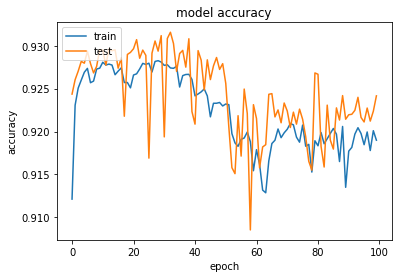

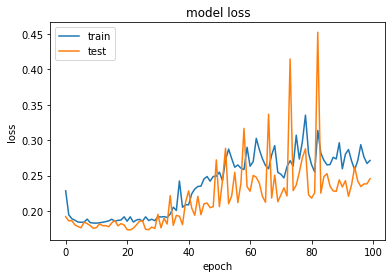

In [ ]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **RNN**

In [ ]:
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], 1, Xtrain.shape[1]))
Xtest = np.reshape(Xtest, (Xtest.shape[0], 1, Xtest.shape[1]))

In [ ]:
# 1. define the network
model = Sequential()
model.add(SimpleRNN(32,input_dim=78, return_sequences=False)) 
model.add(Dropout(0.1))
# model.add(SimpleRNN(32, return_sequences=True))  
# model.add(Dropout(0.1))
# model.add(SimpleRNN(32, return_sequences=True))  
# model.add(Dropout(0.1))
# model.add(SimpleRNN(32, return_sequences=False)) 
# model.add(Dropout(0.1))
model.add(Dense(14))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
with tf.device('/device:GPU:0'):
  model_history = model.fit(Xtrain, Ytrain, batch_size=64, epochs=10, class_weight = weights, validation_data=(Xtest, Ytest))

Epoch 1/10
40167/40167 [==============================] - 148s 4ms/step - loss: 0.5387 - accuracy: 0.8195 - val_loss: 0.3088 - val_accuracy: 0.8813
Epoch 2/10
40167/40167 [==============================] - 145s 4ms/step - loss: 0.3086 - accuracy: 0.8877 - val_loss: 0.2701 - val_accuracy: 0.8973
Epoch 3/10
40167/40167 [==============================] - 144s 4ms/step - loss: 0.2765 - accuracy: 0.8960 - val_loss: 0.2490 - val_accuracy: 0.9094
Epoch 4/10
40167/40167 [==============================] - 145s 4ms/step - loss: 0.2615 - accuracy: 0.9014 - val_loss: 0.2381 - val_accuracy: 0.9094
Epoch 5/10
40167/40167 [==============================] - 144s 4ms/step - loss: 0.2504 - accuracy: 0.9053 - val_loss: 0.2311 - val_accuracy: 0.9134
Epoch 6/10
40167/40167 [==============================] - 144s 4ms/step - loss: 0.2430 - accuracy: 0.9079 - val_loss: 0.2261 - val_accuracy: 0.9139
Epoch 7/10
40167/40167 [==============================] - 145s 4ms/step - loss: 0.2393 - accuracy: 0.9087 - val_

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


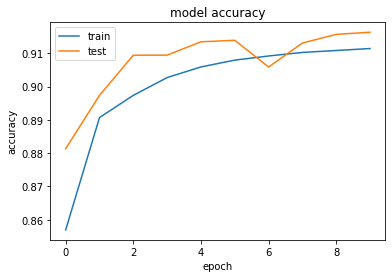

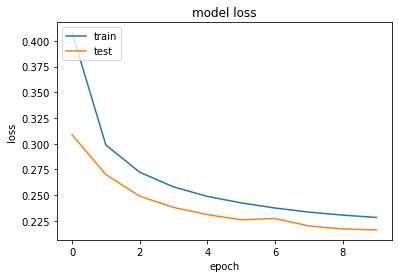

In [ ]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **LSTM**

In [ ]:
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], 1, Xtrain.shape[1]))
Xtest = np.reshape(Xtest, (Xtest.shape[0], 1, Xtest.shape[1]))

In [ ]:
model = Sequential()
model.add(LSTM(32,input_dim=78, return_sequences=False))  
model.add(Dropout(0.1))
# model.add(LSTM(32, return_sequences=True))  
# model.add(Dropout(0.1))
# model.add(LSTM(32, return_sequences=True))  
# model.add(Dropout(0.1))
# model.add(LSTM(32, return_sequences=False))
# model.add(Dropout(0.1))
model.add(Dense(14))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
with tf.device('/device:GPU:0'):
  model_history = model.fit(Xtrain, Ytrain, batch_size=64, epochs=10, class_weight = weights, validation_data=(Xtest, Ytest))

Epoch 1/10
40167/40167 [==============================] - 178s 4ms/step - loss: 0.5238 - accuracy: 0.8248 - val_loss: 0.2703 - val_accuracy: 0.8949
Epoch 2/10
40167/40167 [==============================] - 146s 4ms/step - loss: 0.2659 - accuracy: 0.8996 - val_loss: 0.2321 - val_accuracy: 0.9158
Epoch 3/10
40167/40167 [==============================] - 148s 4ms/step - loss: 0.2341 - accuracy: 0.9131 - val_loss: 0.2166 - val_accuracy: 0.9185
Epoch 4/10
40167/40167 [==============================] - 147s 4ms/step - loss: 0.2182 - accuracy: 0.9178 - val_loss: 0.2067 - val_accuracy: 0.9211
Epoch 5/10
40167/40167 [==============================] - 148s 4ms/step - loss: 0.2109 - accuracy: 0.9194 - val_loss: 0.2025 - val_accuracy: 0.9207
Epoch 6/10
40167/40167 [==============================] - 147s 4ms/step - loss: 0.2053 - accuracy: 0.9209 - val_loss: 0.1994 - val_accuracy: 0.9217
Epoch 7/10
40167/40167 [==============================] - 149s 4ms/step - loss: 0.2029 - accuracy: 0.9213 - val_

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


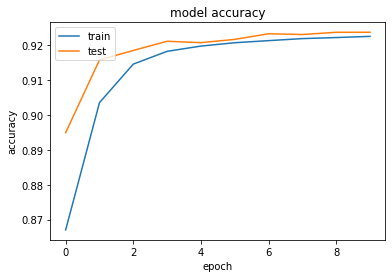

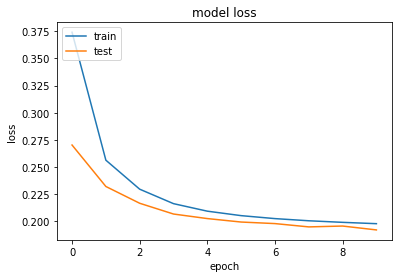

In [ ]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **GRU**

In [ ]:
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], 1, Xtrain.shape[1]))
Xtest = np.reshape(Xtest, (Xtest.shape[0], 1, Xtest.shape[1]))

In [ ]:
model = Sequential()
model.add(GRU(32,input_dim=78, return_sequences=False))  
model.add(Dropout(0.1))
# model.add(GRU(32, return_sequences=True))  
# model.add(Dropout(0.1))
# model.add(GRU(32, return_sequences=True))  
# model.add(Dropout(0.1))
# model.add(GRU(32, return_sequences=False))
# model.add(Dropout(0.1))
model.add(Dense(14))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
with tf.device('/device:GPU:0'):
  model_history = model.fit(Xtrain, Ytrain, batch_size=64, epochs=10, class_weight = weights, validation_data=(Xtest, Ytest))

Epoch 1/10
40167/40167 [==============================] - 154s 3ms/step - loss: 0.5167 - accuracy: 0.8229 - val_loss: 0.2721 - val_accuracy: 0.8969
Epoch 2/10
40167/40167 [==============================] - 123s 3ms/step - loss: 0.2662 - accuracy: 0.8988 - val_loss: 0.2301 - val_accuracy: 0.9129
Epoch 3/10
40167/40167 [==============================] - 124s 3ms/step - loss: 0.2329 - accuracy: 0.9126 - val_loss: 0.2136 - val_accuracy: 0.9189
Epoch 4/10
40167/40167 [==============================] - 124s 3ms/step - loss: 0.2179 - accuracy: 0.9169 - val_loss: 0.2054 - val_accuracy: 0.9201
Epoch 5/10
40167/40167 [==============================] - 124s 3ms/step - loss: 0.2107 - accuracy: 0.9189 - val_loss: 0.2000 - val_accuracy: 0.9215
Epoch 6/10
40167/40167 [==============================] - 125s 3ms/step - loss: 0.2069 - accuracy: 0.9197 - val_loss: 0.1977 - val_accuracy: 0.9222
Epoch 7/10
40167/40167 [==============================] - 125s 3ms/step - loss: 0.2034 - accuracy: 0.9208 - val_

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


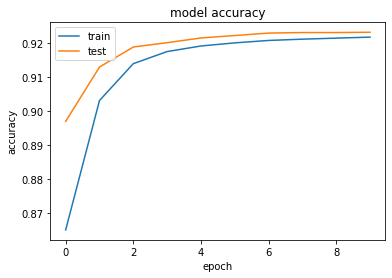

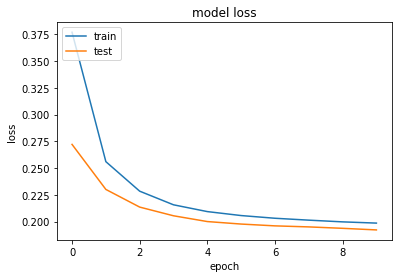

In [ ]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **AutoEncoder Neural Network**

## **AutoEncoder with 5 Layers (78 -> 64 -> 32 -> 64 -> 78)**

### **5 Layered AutoEncoder Creation**

In [ ]:
#### Defining Autoencoder ####
#### Defining the AutoEncoder Model ####
# 78 -> 128 -> 64 -> 32 -> 64 -> 128 -> 78 #

#### INPUT Layer ####
input_layer = Input(shape=(78,))
#### Encoder Layer - 64 ####
encoded_layer = Dense(64, activation='relu', activity_regularizer=regularizers.l2(10e-5))(input_layer)
#### BottleNeck ####
bottleneck = Dense(32, activation='relu')(encoded_layer)
#### Decoder Layer - 64 ####
decoded_layer = Dense(64, activation='relu')(bottleneck)
#### OutPut Layer ####
output_layer = Dense(78, activation='relu')(decoded_layer)

AutoEncoder = Model(inputs = input_layer, outputs = output_layer)
AutoEncoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 78)]              0         
_________________________________________________________________
dense (Dense)                (None, 64)                5056      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 78)                5070      
Total params: 14,318
Trainable params: 14,318
Non-trainable params: 0
_________________________________________________________________


In [ ]:
AutoEncoder.compile(optimizer='rmsprop', loss='mse')

In [ ]:
with tf.device('/device:GPU:0'):
  AutoEncoder_History = AutoEncoder.fit(X_train, X_train, batch_size=64, epochs=30, validation_data=(X_test, X_test))

Epoch 1/30
40167/40167 [==============================] - 115s 3ms/step - loss: 6.8673e-04 - val_loss: 3.5415e-04
Epoch 2/30
40167/40167 [==============================] - 111s 3ms/step - loss: 3.5634e-04 - val_loss: 3.5723e-04
Epoch 3/30
40167/40167 [==============================] - 112s 3ms/step - loss: 3.5442e-04 - val_loss: 3.4995e-04
Epoch 4/30
40167/40167 [==============================] - 113s 3ms/step - loss: 3.4946e-04 - val_loss: 3.5053e-04
Epoch 5/30
40167/40167 [==============================] - 110s 3ms/step - loss: 3.4751e-04 - val_loss: 3.4805e-04
Epoch 6/30
40167/40167 [==============================] - 112s 3ms/step - loss: 3.4701e-04 - val_loss: 3.4556e-04
Epoch 7/30
40167/40167 [==============================] - 112s 3ms/step - loss: 3.4541e-04 - val_loss: 3.4655e-04
Epoch 8/30
40167/40167 [==============================] - 112s 3ms/step - loss: 3.4625e-04 - val_loss: 3.4555e-04
Epoch 9/30
40167/40167 [==============================] - 113s 3ms/step - loss: 3.4574e-

dict_keys(['loss', 'val_loss'])


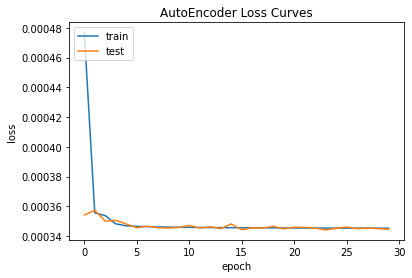

In [ ]:
print(AutoEncoder_History.history.keys())
# # summarize history for accuracy
# plt.plot(AutoEncoder_History.history['accuracy'])
# plt.plot(AutoEncoder_History.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()
# summarize history for loss
plt.plot(AutoEncoder_History.history['loss'])
plt.plot(AutoEncoder_History.history['val_loss'])
plt.title('AutoEncoder Loss Curves')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
AutoEncoder.evaluate(X_test, X_test)

20084/20084 [==============================] - 30s 2ms/step - loss: 3.4457e-04


0.0003445663896854967

In [ ]:
AutoEncoder.save('/content/drive/MyDrive/M.Tech Project/Dataset and Codes/Saved Models/AutoEncoder5LayerMulticlass.h5')

In [ ]:
AutoEncoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 78)]              0         
_________________________________________________________________
dense (Dense)                (None, 64)                5056      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 78)                5070      
Total params: 14,318
Trainable params: 14,318
Non-trainable params: 0
_________________________________________________________________


### **5 Layered AutoEncoder for Multiclass**

In [ ]:
AutoEncoder = load_model('/content/drive/MyDrive/M.Tech Project/Dataset and Codes/Saved Models/AutoEncoder5Layer.h5')

In [ ]:
AutoEncoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 78)]              0         
_________________________________________________________________
dense (Dense)                (None, 64)                5056      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 78)                5070      
Total params: 14,318
Trainable params: 14,318
Non-trainable params: 0
_________________________________________________________________


In [ ]:
encoder = Sequential()
encoder.add(AutoEncoder.layers[0])
encoder.add(AutoEncoder.layers[1])
encoder.add(AutoEncoder.layers[2])
encoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                5056      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
Total params: 7,136
Trainable params: 7,136
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)
print(X_train_encoded.shape, X_test_encoded.shape)

(2570676, 32) (642670, 32)


In [ ]:
print(Y_train.shape, Y_test.shape)

(2570676, 14) (642670, 14)


### **Model without Class Weights**

In [ ]:
# 1. define the network
model = Sequential()
model.add(Dense(1024,input_dim=32,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(768,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(512,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(256,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(128,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(14))
model.add(Activation('softmax'))

# try using different optimizers and different optimizer configs
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
with tf.device('/device:GPU:0'):
  model_history = model.fit(X_train_encoded, Y_train, validation_data=(X_test_encoded, Y_test), batch_size=64, epochs=30)
model.save('/content/drive/MyDrive/M.Tech Project/Dataset and Codes/Saved Models/AutoEncoder5LayerDNN5LayerMulticlass.h5')

Epoch 1/30
40167/40167 [==============================] - 163s 4ms/step - loss: 0.2584 - accuracy: 0.9032 - val_loss: 0.1947 - val_accuracy: 0.9236
Epoch 2/30
40167/40167 [==============================] - 162s 4ms/step - loss: 0.2000 - accuracy: 0.9220 - val_loss: 0.2140 - val_accuracy: 0.9116
Epoch 3/30
40167/40167 [==============================] - 160s 4ms/step - loss: 0.1947 - accuracy: 0.9240 - val_loss: 0.1898 - val_accuracy: 0.9255
Epoch 4/30
40167/40167 [==============================] - 161s 4ms/step - loss: 0.1919 - accuracy: 0.9250 - val_loss: 0.1907 - val_accuracy: 0.9245
Epoch 5/30
40167/40167 [==============================] - 159s 4ms/step - loss: 0.1902 - accuracy: 0.9257 - val_loss: 0.2019 - val_accuracy: 0.9228
Epoch 6/30
40167/40167 [==============================] - 159s 4ms/step - loss: 0.1898 - accuracy: 0.9258 - val_loss: 0.1894 - val_accuracy: 0.9264
Epoch 7/30
40167/40167 [==============================] - 160s 4ms/step - loss: 0.1899 - accuracy: 0.9263 - val_

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


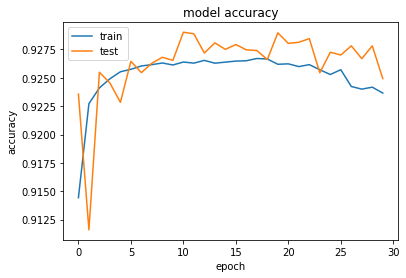

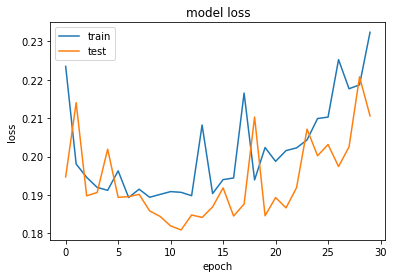

In [ ]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(X_test_encoded, Y_test)

20084/20084 [==============================] - 51s 3ms/step - loss: 0.2106 - accuracy: 0.9249


[0.2105974704027176, 0.9249287843704224]

In [ ]:
Y_predicted = np.round(model.predict(X_test_encoded))
Y_predicted = np.reshape(Y_predicted, Y_test.shape)
print(classification_report(Y_test, Y_predicted))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.88      1.00      0.93    208521
           1       1.00      1.00      1.00     57238
           2       0.00      0.00      0.00       122
           3       0.00      0.00      0.00        46
           4       1.00      1.00      1.00    137203
           5       1.00      0.99      0.99       346
           6       0.99      0.44      0.61      8302
           7       1.00      1.00      1.00     92382
           8       0.76      0.50      0.61     27978
           9       0.93      0.93      0.93      2198
          10       0.71      0.89      0.79     38671
          11       0.95      0.25      0.40     32128
          12       0.00      0.00      0.00        17
          13       1.00      1.00      1.00     37518

   micro avg       0.93      0.92      0.92    642670
   macro avg       0.73      0.64      0.66    642670
weighted avg       0.93      0.92      0.91    642670
 samples avg       0.92   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Model with Class Weights**

In [ ]:
# 1. define the network
model = Sequential()
model.add(Dense(1024,input_dim=32,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(768,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(512,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(256,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(128,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(14))
model.add(Activation('softmax'))

# try using different optimizers and different optimizer configs
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
with tf.device('/device:GPU:0'):
  model_history = model.fit(X_train_encoded, Y_train, validation_data=(X_test_encoded, Y_test), class_weight=weights_updated , batch_size=64, epochs=50)

Epoch 1/50
40167/40167 [==============================] - 165s 4ms/step - loss: 1.9124 - accuracy: 0.8233 - val_loss: 0.3564 - val_accuracy: 0.8782
Epoch 2/50
40167/40167 [==============================] - 163s 4ms/step - loss: 2.5363 - accuracy: 0.7700 - val_loss: 2.0924 - val_accuracy: 0.5285
Epoch 3/50
40167/40167 [==============================] - 163s 4ms/step - loss: 3.2062 - accuracy: 0.5998 - val_loss: 1.2597 - val_accuracy: 0.6260
Epoch 4/50
40167/40167 [==============================] - 163s 4ms/step - loss: 3.1011 - accuracy: 0.6246 - val_loss: 1.1602 - val_accuracy: 0.6308
Epoch 5/50
40167/40167 [==============================] - 163s 4ms/step - loss: 2.9513 - accuracy: 0.6287 - val_loss: 1.3829 - val_accuracy: 0.6257
Epoch 6/50
40167/40167 [==============================] - 162s 4ms/step - loss: 2.9631 - accuracy: 0.6282 - val_loss: 1.1716 - val_accuracy: 0.6315
Epoch 7/50
40167/40167 [==============================] - 162s 4ms/step - loss: 3.1914 - accuracy: 0.6273 - val_

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


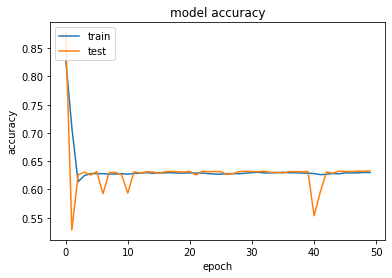

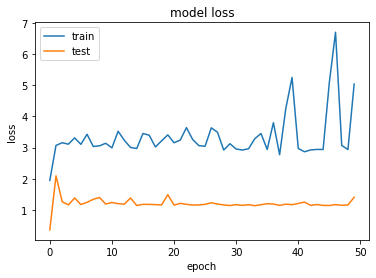

In [ ]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


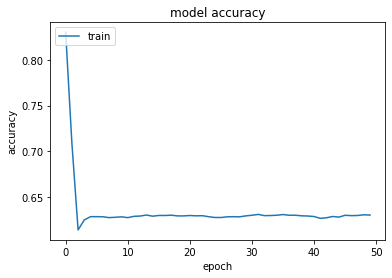

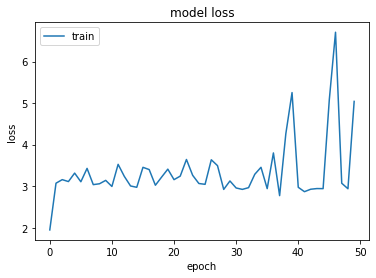

In [ ]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
#plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
#plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


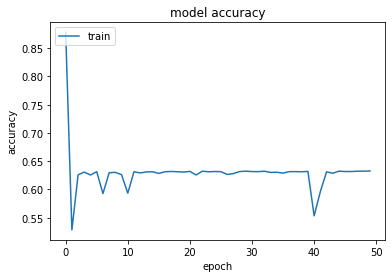

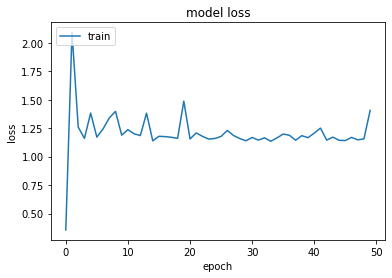

In [ ]:
print(model_history.history.keys())
# summarize history for accuracy
#plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
#plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


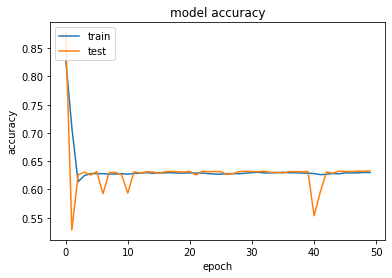

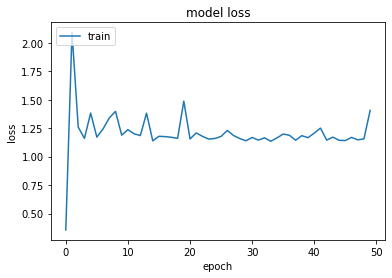

In [ ]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
#plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(X_test_encoded, Y_test)

20084/20084 [==============================] - 49s 2ms/step - loss: 1.4058 - accuracy: 0.6328


[1.405848503112793, 0.6327648758888245]

In [ ]:
Y_predicted = model.predict(X_test_encoded)
print(Y_predicted.shape)

(642670, 14)


In [ ]:
print(Y_predicted[0])

[0.19486429 0.00046298 0.05779508 0.06435647 0.00020396 0.06100317
 0.05660869 0.12290341 0.07519479 0.06711902 0.10380295 0.04153791
 0.05268461 0.10146269]


In [ ]:
print(Y_predicted.shape, Y_test.shape)

(642670, 14) (642670, 14)


In [ ]:
Y_predicted = np.round(Y_predicted)
Y_predicted = np.reshape(Y_predicted, Y_test.shape)
print(Y_predicted.shape)

(642670, 14)


In [ ]:
print(classification_report(Y_test, Y_predicted))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.80      0.00      0.01    208521
           1       1.00      0.99      1.00     57238
           2       0.00      0.00      0.00       122
           3       0.00      0.00      0.00        46
           4       1.00      1.00      1.00    137203
           5       0.00      0.00      0.00       346
           6       0.00      0.00      0.00      8302
           7       0.00      0.00      0.00     92382
           8       0.00      0.00      0.00     27978
           9       0.00      0.00      0.00      2198
          10       0.00      0.00      0.00     38671
          11       0.96      0.13      0.24     32128
          12       0.00      0.00      0.00        17
          13       0.00      0.00      0.00     37518

   micro avg       1.00      0.31      0.47    642670
   macro avg       0.27      0.15      0.16    642670
weighted avg       0.61      0.31      0.32    642670
 samples avg       0.31   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# cm = confusion_matrix(Y_test, Y_predicted)
# print(cm)

cm = confusion_matrix(Y_test.argmax(axis=1), Y_predicted.argmax(axis=1))
print(cm)

[[208302      1      0      0     33      0      0      0      0      0
       0    185      0      0]
 [   338  56891      0      0      0      0      0      0      0      0
       0      9      0      0]
 [   122      0      0      0      0      0      0      0      0      0
       0      0      0      0]
 [    46      0      0      0      0      0      0      0      0      0
       0      0      0      0]
 [    46      0      0      0 137157      0      0      0      0      0
       0      0      0      0]
 [   346      0      0      0      0      0      0      0      0      0
       0      0      0      0]
 [  8302      0      0      0      0      0      0      0      0      0
       0      0      0      0]
 [ 92382      0      0      0      0      0      0      0      0      0
       0      0      0      0]
 [ 27978      0      0      0      0      0      0      0      0      0
       0      0      0      0]
 [  2198      0      0      0      0      0      0      0      0      0
 

In [ ]:
model.save('/content/drive/MyDrive/M.Tech Project/Dataset and Codes/Saved Models/AutoEncoder5LayeredDNN5layeredMulticlassWeighted.h5')

# **SMOTE for OverSampling**

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/M.Tech Project/Dataset and Codes/CIC IDS 2018/cic-ids-2018-preprocessed.csv")
dataset = dataset.drop(['Unnamed: 0', 'label'],axis=1)
dataset.shape

(3213346, 79)

In [ ]:
dataset.head()

,dst_port,protocol,flow_duration,tot_fwd_pkts,tot_bwd_pkts,totlen_fwd_pkts,totlen_bwd_pkts,fwd_pkt_len_max,fwd_pkt_len_min,fwd_pkt_len_mean,fwd_pkt_len_std,bwd_pkt_len_max,bwd_pkt_len_min,bwd_pkt_len_mean,bwd_pkt_len_std,flow_byts_s,flow_pkts_s,flow_iat_mean,flow_iat_std,flow_iat_max,flow_iat_min,fwd_iat_tot,fwd_iat_mean,fwd_iat_std,fwd_iat_max,fwd_iat_min,bwd_iat_tot,bwd_iat_mean,bwd_iat_std,bwd_iat_max,bwd_iat_min,fwd_psh_flags,bwd_psh_flags,fwd_urg_flags,bwd_urg_flags,fwd_header_len,bwd_header_len,fwd_pkts_s,bwd_pkts_s,pkt_len_min,pkt_len_max,pkt_len_mean,pkt_len_std,pkt_len_var,fin_flag_cnt,syn_flag_cnt,rst_flag_cnt,psh_flag_cnt,ack_flag_cnt,urg_flag_cnt,cwe_flag_count,ece_flag_cnt,down_up_ratio,pkt_size_avg,fwd_seg_size_avg,bwd_seg_size_avg,fwd_byts_b_avg,fwd_pkts_b_avg,fwd_blk_rate_avg,bwd_byts_b_avg,bwd_pkts_b_avg,bwd_blk_rate_avg,subflow_fwd_pkts,subflow_fwd_byts,subflow_bwd_pkts,subflow_bwd_byts,init_fwd_win_byts,init_bwd_win_byts,fwd_act_data_pkts,fwd_seg_size_min,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,category
0,8080,6,16079.0,3,4,326,129,326,0,108.666667,188.216188,112,0,32.25,53.767245,28297.77971,435.350457,2679.833333,6080.854855,15084.0,1.0,645.0,322.5,374.059487,587.0,58.0,15513.0,5171.000000,8587.564206,15084.0,1,0,0,0,0,72,92,186.578767,248.771690,0,326,56.875,115.406657,13318.69643,0,0,1,1,0,0,0,1,1,65.0,108.666667,32.25,0,0,0,0,0,0,3,326,4,129,8192,219,1,20,0.0,0.0,0,0,0.0,0.0,0.0,0.0,1
1,8080,6,577.0,2,0,0,0,0,0,0.000000,0.000000,0,0,0.00,0.000000,0.00000,3466.204506,577.000000,0.000000,577.0,577.0,577.0,577.0,0.000000,577.0,577.0,0.0,0.000000,0.000000,0.0,0,0,0,0,0,40,0,3466.204506,0.000000,0,0,0.000,0.000000,0.00000,0,0,0,0,1,0,0,0,0,0.0,0.000000,0.00,0,0,0,0,0,0,2,0,0,0,2052,-1,0,20,0.0,0.0,0,0,0.0,0.0,0.0,0.0,1
2,8080,6,10279.0,3,4,326,129,326,0,108.666667,188.216188,112,0,32.25,53.767245,44265.00632,681.000097,1713.166667,3693.591716,9243.0,20.0,577.0,288.5,335.875721,526.0,51.0,9773.0,3257.666667,5185.563165,9243.0,117,0,0,0,0,72,92,291.857185,389.142913,0,326,56.875,115.406657,13318.69643,0,0,1,1,0,0,0,1,1,65.0,108.666667,32.25,0,0,0,0,0,0,3,326,4,129,8192,219,1,20,0.0,0.0,0,0,0.0,0.0,0.0,0.0,1
3,8080,6,457.0,2,0,0,0,0,0,0.000000,0.000000,0,0,0.00,0.000000,0.00000,4376.367615,457.000000,0.000000,457.0,457.0,457.0,457.0,0.000000,457.0,457.0,0.0,0.000000,0.000000,0.0,0,0,0,0,0,40,0,4376.367615,0.000000,0,0,0.000,0.000000,0.00000,0,0,0,0,1,0,0,0,0,0.0,0.000000,0.00,0,0,0,0,0,0,2,0,0,0,2052,-1,0,20,0.0,0.0,0,0,0.0,0.0,0.0,0.0,1
4,8080,6,10271.0,3,4,326,129,326,0,108.666667,188.216188,112,0,32.25,53.767245,44299.48398,681.530523,1711.833333,3786.768196,9434.0,20.0,502.0,251.0,288.499567,455.0,47.0,9836.0,3278.666667,5333.075692,9434.0,41,0,0,0,0,72,92,292.084510,389.446013,0,326,56.875,115.406657,13318.69643,0,0,1,1,0,0,0,1,1,65.0,108.666667,32.25,0,0,0,0,0,0,3,326,4,129,8192,219,1,20,0.0,0.0,0,0,0.0,0.0,0.0,0.0,1


In [ ]:
X = dataset.iloc[:, :-1]
Y = dataset.iloc[:,-1]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2570676, 78)
(2570676,)
(642670, 78)
(642670,)


In [ ]:
Y_train.value_counts()

0     834082
4     548809
7     369530
1     228953
10    154683
13    150071
11    128511
8     111912
6      33206
9       8792
5       1384
2        489
3        184
12        70
Name: category, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
strategy = {6:100000, 9:100000, 5:100000, 2:100000, 3:100000, 12:100000}
oversample = SMOTE(sampling_strategy = strategy)
X_train, Y_train = oversample.fit_resample(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
##Normalizing the X_train
scaler = Normalizer().fit(X_train)
X_train = scaler.transform(X_train)

In [ ]:
##Normalizing the X_test
scaler = Normalizer().fit(X_test)
X_test = scaler.transform(X_test)

In [ ]:
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

In [ ]:
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [ ]:
print(type(X_train))
print(type(X_test))
print(type(Y_train))
print(type(Y_test))

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

In [ ]:
AutoEncoder = load_model('/content/drive/MyDrive/M.Tech Project/Dataset and Codes/Saved Models/AutoEncoder5Layer.h5')

In [ ]:
AutoEncoder.summary()

In [ ]:
encoder = Sequential()
encoder.add(AutoEncoder.layers[0])
encoder.add(AutoEncoder.layers[1])
encoder.add(AutoEncoder.layers[2])
encoder.summary()

In [ ]:
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

(2570676, 32) (642670, 32)


In [ ]:
print(X_train_encoded.shape,X_test_encoded.shape)
print(Y_train.shape,Y_test.shape)

In [ ]:
# 1. define the network
model = Sequential()
model.add(Dense(1024,input_dim=32,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(768,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(512,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(256,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(128,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(14))
model.add(Activation('softmax'))

# try using different optimizers and different optimizer configs
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
with tf.device('/device:GPU:0'):
  model_history = model.fit(X_train_encoded, Y_train, validation_data=(X_test_encoded, Y_test), batch_size=64, epochs=30)
model.save('/content/drive/MyDrive/M.Tech Project/Dataset and Codes/Saved Models/AutoEncoder5LayerDNN5LayerMulticlassSMOTE.h5')

In [ ]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(X_test_encoded, Y_test)

In [ ]:
Y_predicted = np.round(model.predict(X_test_encoded))
Y_predicted = np.reshape(Y_predicted, Y_test.shape)
print(classification_report(Y_test, Y_predicted))

# **SMOTE for OverSampling**

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/M.Tech Project/Dataset and Codes/CIC IDS 2018/cic-ids-2018-multiclass.csv")
dataset = dataset.drop(['Unnamed: 0', 'label'],axis=1)
dataset.shape

(2170743, 79)

In [ ]:
dataset.head()

,dst_port,protocol,flow_duration,tot_fwd_pkts,tot_bwd_pkts,totlen_fwd_pkts,totlen_bwd_pkts,fwd_pkt_len_max,fwd_pkt_len_min,fwd_pkt_len_mean,fwd_pkt_len_std,bwd_pkt_len_max,bwd_pkt_len_min,bwd_pkt_len_mean,bwd_pkt_len_std,flow_byts_s,flow_pkts_s,flow_iat_mean,flow_iat_std,flow_iat_max,flow_iat_min,fwd_iat_tot,fwd_iat_mean,fwd_iat_std,fwd_iat_max,fwd_iat_min,bwd_iat_tot,bwd_iat_mean,bwd_iat_std,bwd_iat_max,bwd_iat_min,fwd_psh_flags,bwd_psh_flags,fwd_urg_flags,bwd_urg_flags,fwd_header_len,bwd_header_len,fwd_pkts_s,bwd_pkts_s,pkt_len_min,pkt_len_max,pkt_len_mean,pkt_len_std,pkt_len_var,fin_flag_cnt,syn_flag_cnt,rst_flag_cnt,psh_flag_cnt,ack_flag_cnt,urg_flag_cnt,cwe_flag_count,ece_flag_cnt,down_up_ratio,pkt_size_avg,fwd_seg_size_avg,bwd_seg_size_avg,fwd_byts_b_avg,fwd_pkts_b_avg,fwd_blk_rate_avg,bwd_byts_b_avg,bwd_pkts_b_avg,bwd_blk_rate_avg,subflow_fwd_pkts,subflow_fwd_byts,subflow_bwd_pkts,subflow_bwd_byts,init_fwd_win_byts,init_bwd_win_byts,fwd_act_data_pkts,fwd_seg_size_min,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,category
0,8080,6,16079.0,3,4,326,129,326,0,108.666667,188.216188,112,0,32.25,53.767245,28297.77971,435.350457,2679.833333,6080.854855,15084.0,1.0,645.0,322.5,374.059487,587.0,58.0,15513.0,5171.000000,8587.564206,15084.0,1,0,0,0,0,72,92,186.578767,248.771690,0,326,56.875,115.406657,13318.69643,0,0,1,1,0,0,0,1,1,65.0,108.666667,32.25,0,0,0,0,0,0,3,326,4,129,8192,219,1,20,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0
1,8080,6,577.0,2,0,0,0,0,0,0.000000,0.000000,0,0,0.00,0.000000,0.00000,3466.204506,577.000000,0.000000,577.0,577.0,577.0,577.0,0.000000,577.0,577.0,0.0,0.000000,0.000000,0.0,0,0,0,0,0,40,0,3466.204506,0.000000,0,0,0.000,0.000000,0.00000,0,0,0,0,1,0,0,0,0,0.0,0.000000,0.00,0,0,0,0,0,0,2,0,0,0,2052,-1,0,20,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0
2,8080,6,10279.0,3,4,326,129,326,0,108.666667,188.216188,112,0,32.25,53.767245,44265.00632,681.000097,1713.166667,3693.591716,9243.0,20.0,577.0,288.5,335.875721,526.0,51.0,9773.0,3257.666667,5185.563165,9243.0,117,0,0,0,0,72,92,291.857185,389.142913,0,326,56.875,115.406657,13318.69643,0,0,1,1,0,0,0,1,1,65.0,108.666667,32.25,0,0,0,0,0,0,3,326,4,129,8192,219,1,20,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0
3,8080,6,457.0,2,0,0,0,0,0,0.000000,0.000000,0,0,0.00,0.000000,0.00000,4376.367615,457.000000,0.000000,457.0,457.0,457.0,457.0,0.000000,457.0,457.0,0.0,0.000000,0.000000,0.0,0,0,0,0,0,40,0,4376.367615,0.000000,0,0,0.000,0.000000,0.00000,0,0,0,0,1,0,0,0,0,0.0,0.000000,0.00,0,0,0,0,0,0,2,0,0,0,2052,-1,0,20,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0
4,8080,6,10271.0,3,4,326,129,326,0,108.666667,188.216188,112,0,32.25,53.767245,44299.48398,681.530523,1711.833333,3786.768196,9434.0,20.0,502.0,251.0,288.499567,455.0,47.0,9836.0,3278.666667,5333.075692,9434.0,41,0,0,0,0,72,92,292.084510,389.446013,0,326,56.875,115.406657,13318.69643,0,0,1,1,0,0,0,1,1,65.0,108.666667,32.25,0,0,0,0,0,0,3,326,4,129,8192,219,1,20,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0


In [ ]:
X = dataset.iloc[:, :-1]
Y = dataset.iloc[:,-1]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1736594, 78)
(1736594,)
(434149, 78)
(434149,)


In [ ]:
Y_train.value_counts()

3     548809
6     369530
0     228953
9     154683
12    150071
10    128511
7     111912
5      33206
8       8792
4       1384
1        489
2        184
11        70
Name: category, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
strategy = {5:100000, 8:100000, 4:100000, 1:100000, 2:100000, 11:100000}
oversample = SMOTE(sampling_strategy = strategy)
X_train, Y_train = oversample.fit_resample(X_train, Y_train)

In [ ]:
Y_train.shape

(2292469,)

In [ ]:
Y_oversample = pd.DataFrame(Y_train, columns=['category'])

In [ ]:
Y_oversample.value_counts()

category
3           548809
6           369530
0           228953
9           154683
12          150071
10          128511
7           111912
11          100000
8           100000
5           100000
4           100000
2           100000
1           100000
dtype: int64

In [ ]:
print(X_train.shape,Y_train.shape)

(2292469, 78) (2292469,)


### **Model without Class Weights**

In [ ]:
# 1. define the network
model = Sequential()
model.add(Dense(1024,input_dim=32,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(768,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(512,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(256,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(128,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(14))
model.add(Activation('softmax'))

# try using different optimizers and different optimizer configs
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
with tf.device('/device:GPU:0'):
  model_history = model.fit(X_train_encoded, Y_train, validation_data=(X_test_encoded, Y_test), batch_size=64, epochs=30)
model.save('/content/drive/MyDrive/M.Tech Project/Dataset and Codes/Saved Models/AutoEncoder5LayerDNN5LayerMulticlass.h5')

Epoch 1/30
40167/40167 [==============================] - 163s 4ms/step - loss: 0.2584 - accuracy: 0.9032 - val_loss: 0.1947 - val_accuracy: 0.9236
Epoch 2/30
40167/40167 [==============================] - 162s 4ms/step - loss: 0.2000 - accuracy: 0.9220 - val_loss: 0.2140 - val_accuracy: 0.9116
Epoch 3/30
40167/40167 [==============================] - 160s 4ms/step - loss: 0.1947 - accuracy: 0.9240 - val_loss: 0.1898 - val_accuracy: 0.9255
Epoch 4/30
40167/40167 [==============================] - 161s 4ms/step - loss: 0.1919 - accuracy: 0.9250 - val_loss: 0.1907 - val_accuracy: 0.9245
Epoch 5/30
40167/40167 [==============================] - 159s 4ms/step - loss: 0.1902 - accuracy: 0.9257 - val_loss: 0.2019 - val_accuracy: 0.9228
Epoch 6/30
40167/40167 [==============================] - 159s 4ms/step - loss: 0.1898 - accuracy: 0.9258 - val_loss: 0.1894 - val_accuracy: 0.9264
Epoch 7/30
40167/40167 [==============================] - 160s 4ms/step - loss: 0.1899 - accuracy: 0.9263 - val_

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


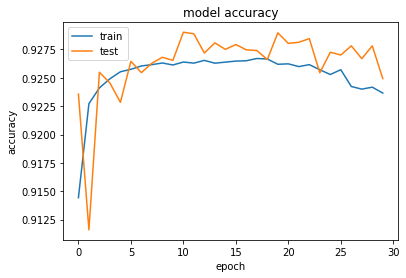

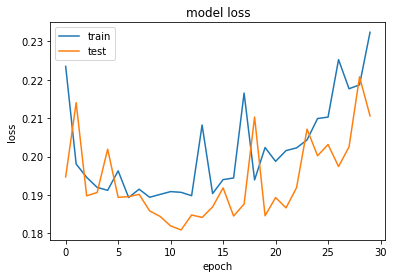

In [ ]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(X_test_encoded, Y_test)

20084/20084 [==============================] - 51s 3ms/step - loss: 0.2106 - accuracy: 0.9249


[0.2105974704027176, 0.9249287843704224]

In [ ]:
Y_predicted = np.round(model.predict(X_test_encoded))
Y_predicted = np.reshape(Y_predicted, Y_test.shape)
print(classification_report(Y_test, Y_predicted))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.88      1.00      0.93    208521
           1       1.00      1.00      1.00     57238
           2       0.00      0.00      0.00       122
           3       0.00      0.00      0.00        46
           4       1.00      1.00      1.00    137203
           5       1.00      0.99      0.99       346
           6       0.99      0.44      0.61      8302
           7       1.00      1.00      1.00     92382
           8       0.76      0.50      0.61     27978
           9       0.93      0.93      0.93      2198
          10       0.71      0.89      0.79     38671
          11       0.95      0.25      0.40     32128
          12       0.00      0.00      0.00        17
          13       1.00      1.00      1.00     37518

   micro avg       0.93      0.92      0.92    642670
   macro avg       0.73      0.64      0.66    642670
weighted avg       0.93      0.92      0.91    642670
 samples avg       0.92   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
